# Pymaceuticals

Analysis Report:


- The bar graph pictures all the drug regimen in one graph which can conclude that Capomulin holds the max number of mice tested and propriva with the least amount. 
- The line plot displays the relationship between total tumour volume vs. The timepoint for a single mouse treated with Capomulin. From this data we can gather that the overall total tutor volume decreases overtime 
- This observes that from the selected drug regiments Capomulin is concluded to reduce the size of tumours immensely in comparison to the other treatments.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#Combine the data into a single frame data
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

#display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Check the number of mice
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df[['Mouse ID', 'Timepoint']].duplicated() ==True]
mice_id = duplicate_mice["Mouse ID"].unique()
mice_id

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_data = combined_df.loc[combined_df["Mouse ID"]==mice_id[0]]
mice_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
#Check number of mice in the clean DataFrame
clean_mice_df = combined_df["Mouse ID"].nunique()
clean_mice_df

249

# Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_group_data = clean_df.groupby(["Drug Regimen"])
drug_mean = drug_group_data["Tumor Volume (mm3)"].mean()
drug_median = drug_group_data["Tumor Volume (mm3)"].median()
drug_variance = drug_group_data["Tumor Volume (mm3)"].var()
drug_std_dev = drug_group_data["Tumor Volume (mm3)"].std()
drug_sem = drug_group_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_sum_df = pd.DataFrame ({"Mean Tumor Volume": drug_mean,
                                    "Median Tumor Volume": drug_median,
                                    "Tumor Volume Variance": drug_variance,
                                    "Tumor Volume Std. Dev": drug_std_dev,
                                    "Tumor Volume Std. Err": drug_sem})
drug_regimen_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_sum_df = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggregation_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

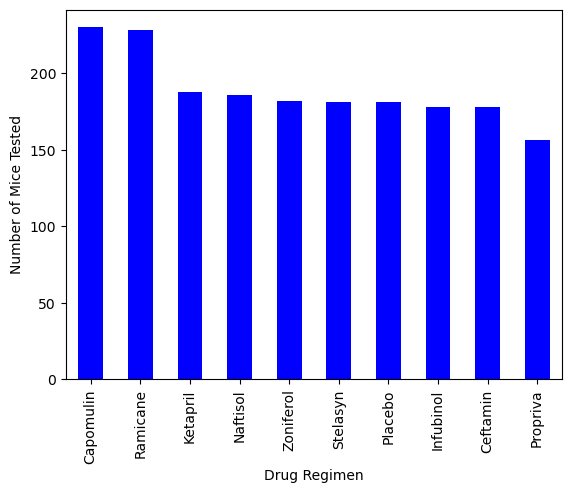

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug = clean_df [["Drug Regimen","Timepoint"]]
mice_drug_count = mice_drug ["Drug Regimen"]. value_counts()
mice_drug_count

mice_drug_count.plot(kind="bar", color ="b",
                    xlabel="Drug Regimen",
                    ylabel="Number of Mice Tested")

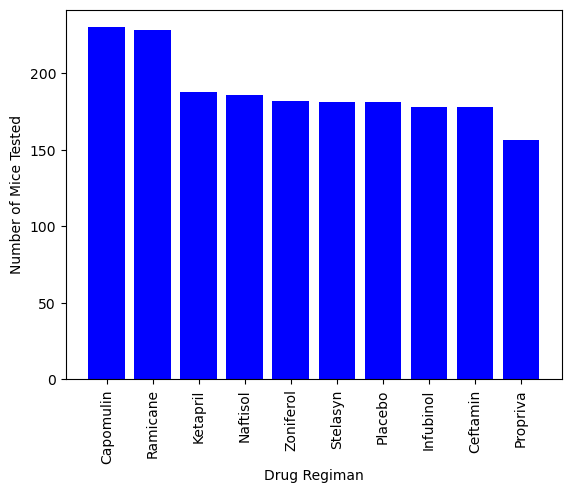

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
drug = mice_drug_count.index.values
count= mice_drug_count.values

#build and display graph
plt.bar(drug, count, color="b", align="center")
plt.xlabel("Drug Regiman")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation =90)
plt.show()

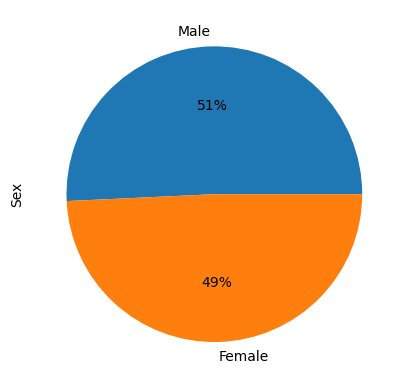

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_df ["Sex"].value_counts()
Sex = ["Male", "Female"]
male_female.plot(kind="pie", autopct="%1.0f%%", ylabel = "Sex")
plt.show()

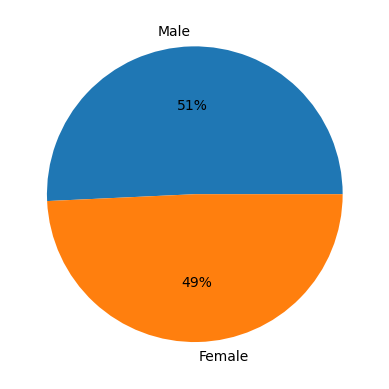

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_df["Sex"].value_counts()
plt.ylabe=("Sex")
plt.pie(sex_distribution, labels=sex_distribution.index, autopct="%1.0f%%")
plt.show()

# Quartiles, Outliers, Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']
Ramicane_df = clean_df.loc[clean_df['Drug Regimen']== 'Ramicane']
Infubinol_df = clean_df.loc[clean_df['Drug Regimen']== 'Infubinol']
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen']== 'Ceftamin']

treatment_df = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
drug_reg = pd.concat(treatment_df)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

new_df = merge_df [["Mouse ID", "Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
new_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a262,Placebo,45,70.717621
3,a275,Ceftamin,45,62.999356
4,a366,Stelasyn,30,63.440686
...,...,...,...,...
244,z435,Propriva,10,48.710661
245,z578,Ramicane,45,30.638696
246,z581,Infubinol,45,62.754451
247,z795,Naftisol,45,65.741070


In [32]:
# Assuming merge_df is the correct DataFrame
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
tum_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = merge_df.loc[merge_df['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    
    # Add subset to tumor_vol_data list
    tum_vol_data.append(volume)
    
    # Calculate quartiles and IQR
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    lower_quar = quartiles[0.25]
    upper_quar = quartiles[0.75]
    iqr = upper_quar - lower_quar
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quar - (1.5 * iqr)
    upper_bound = upper_quar + (1.5 * iqr)
    
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]

# Display the tumor volume data
    if not outliers.empty:
        print(f"The outliers for {drug} are: {outliers}")

print(tum_vol_data)

The outliers for Infubinol are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64, 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume

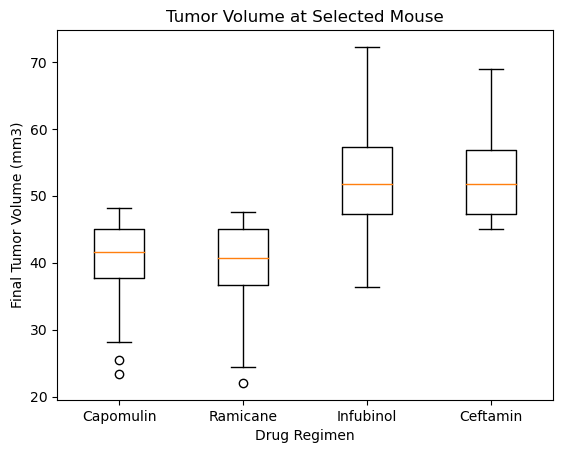

In [36]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plot = [Capomulin_df['Tumor Volume (mm3)'], Ramicane_df['Tumor Volume (mm3)'], Infubinol_df['Tumor Volume (mm3)'], Ceftamin_df['Tumor Volume (mm3)']]
regimen = ['Capomulin','Ramicane','Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_plot, labels= regimen, widths = 0.4, vert=True)
plt.show()

# Line and Scatter Plots

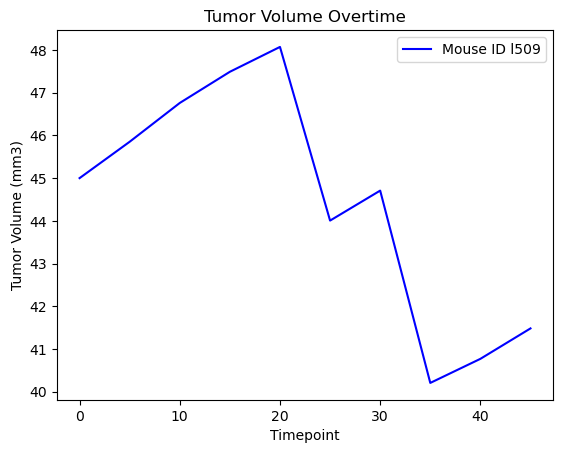

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseID_l509 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509",:]
mouseID_l509.head()

x = mouseID_l509["Timepoint"]
y = mouseID_l509["Tumor Volume (mm3)"]

#create line plot
plt.plot(x,y, color="blue",label="Mouse ID l509")
plt.legend(loc="best")
plt.title("Tumor Volume Overtime")
plt.xlabel("Timepoint")
plt.ylabel()

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_Capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] =="Capomulin")]
capomulin_grouped = new_Capomulin_df.groupby("Mouse ID")

mouse_weight = capomulin_grouped["Weight (g)"].mean()
mouse_tot_vol = capomulin_grouped[("Tumor Volume (mm3)")].mean()

mouse_df = pd.DataFrame({"Weight (g)": mouse_weight,
                        "Tumor Volume(mm3)": mouse_tot_vol})


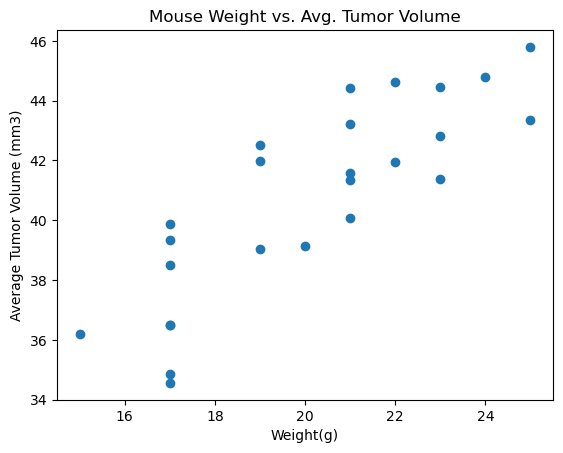

In [71]:
plt.scatter(mouse_weight, mouse_tot_vol)
plt.title('Mouse Weight vs. Avg. Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

# Correlation and Regression

In [72]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(new_Capomulin_df['Weight (g)'], new_Capomulin_df['Tumor Volume (mm3)'])
print(f"Correlation between mouse weight and average tumor volume: {round(correlation[0],2)}")

Correlation between mouse weight and average tumor volume: 0.53


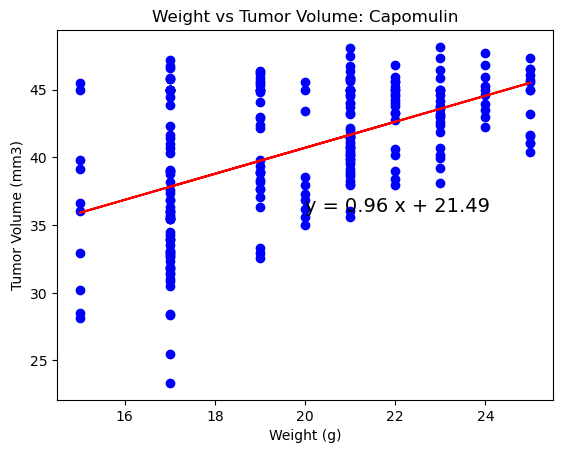

In [74]:
#include linear regression equation and line to create plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(new_Capomulin_df['Weight (g)'], new_Capomulin_df['Tumor Volume (mm3)'])
regress_values = new_Capomulin_df['Weight (g)']* slope + intercept
line_equation=f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(new_Capomulin_df['Weight (g)'], new_Capomulin_df['Tumor Volume (mm3)'], color='blue')
plt.plot(new_Capomulin_df["Weight (g)"], regress_values, color='red')
plt.annotate(line_equation,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume: Capomulin")
plt.show()